## 1. Dataset and libraries

We begin by setting up our working environment by importing the necessary Python libraries that we will use throughout the notebook.

Then we load and inspect the dataset to get familiar with its structure and contents.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
our_file_path= r"K:\User\Dektop\College\Codes\ML Project Leagues Predc\all_tables.csv"

data=pd.read_csv(our_file_path)

In [25]:
data.head()

,Place,Team,GP,W,D,L,GF,GA,GD,P,Year,League
0,1,ARS,38,26,9,3,79,36,43,87,2001,English Premier League
1,2,LIV,38,24,8,6,67,30,37,80,2001,English Premier League
2,3,MAN,38,24,5,9,87,45,42,77,2001,English Premier League
3,4,NEW,38,21,8,9,74,52,22,71,2001,English Premier League
4,5,LEE,38,18,12,8,53,37,16,66,2001,English Premier League






## 2. Data exploration
Here we will perform a preliminary exploration of our dataset to get a better understanding of the data we are working with.

This initial exploration of our data will help uncover underlying patterns and relationships that can inform our choice of models.

In [26]:
data.info

<bound method DataFrame.info of       Place  Team  GP   W   D   L  GF  GA  GD   P  Year  \
0         1   ARS  38  26   9   3  79  36  43  87  2001   
1         2   LIV  38  24   8   6  67  30  37  80  2001   
2         3   MAN  38  24   5   9  87  45  42  77  2001   
3         4   NEW  38  21   8   9  74  52  22  71  2001   
4         5   LEE  38  18  12   8  53  37  16  66  2001   
...     ...   ...  ..  ..  ..  ..  ..  ..  ..  ..   ...   
2479     16  CLER  37   9   9  19  37  67 -30  36  2021   
2480     17   LOR  37   8  11  18  34  62 -28  35  2021   
2481     18  METZ  37   6  13  18  35  64 -29  31  2021   
2482     19  ASSE  37   7  10  20  41  76 -35  31  2021   
2483     20   BOR  37   5  13  19  48  89 -41  28  2021   

                      League  
0     English Premier League  
1     English Premier League  
2     English Premier League  
3     English Premier League  
4     English Premier League  
...                      ...  
2479          French Ligue 1  
2480       

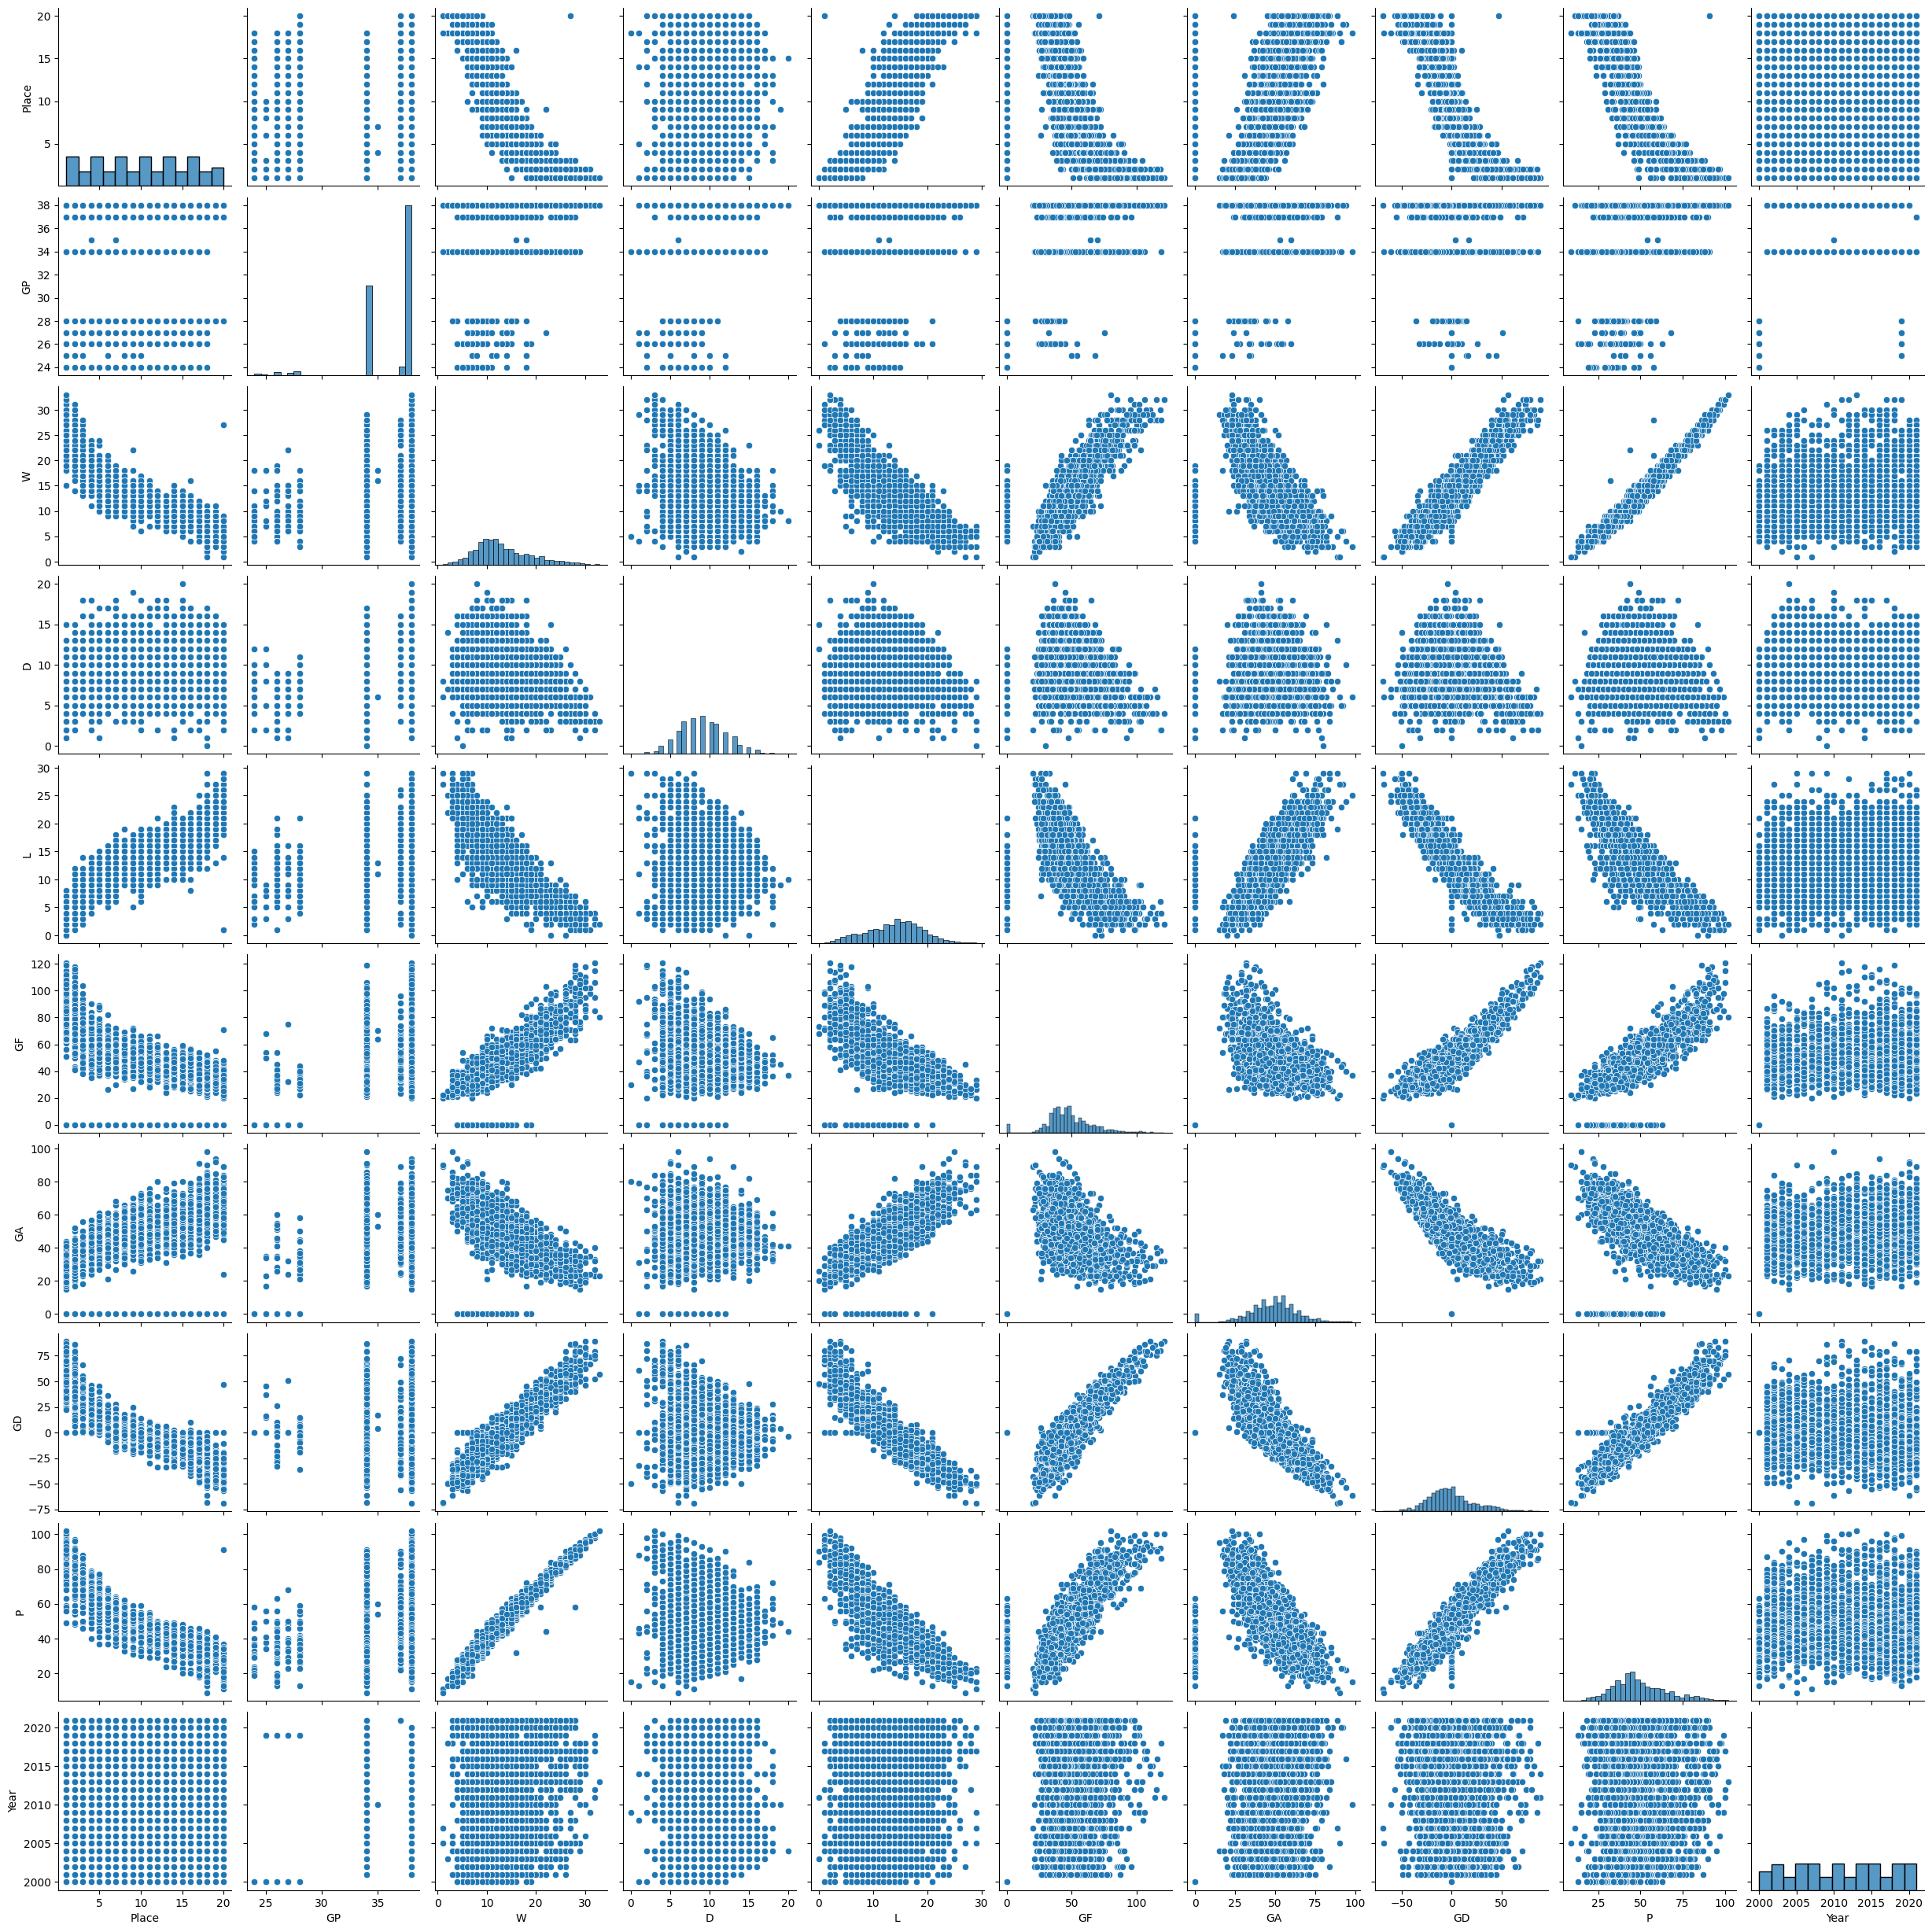

In [27]:
sns.pairplot(data)
plt.show()

In [28]:
data.describe()

,Place,GP,W,D,L,GF,GA,GD,P,Year
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,10.152174,36.173913,13.471820,9.229871,13.471820,48.218599,48.219404,-0.000805,49.570853,2010.774557
std,5.593437,2.805184,5.581131,3.001392,5.197626,17.591236,14.991223,24.072049,16.050446,6.206857
min,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-69.000000,9.000000,2000.000000
25%,5.000000,34.000000,10.000000,7.000000,10.000000,38.000000,40.000000,-16.000000,39.000000,2005.000000
50%,10.000000,38.000000,12.000000,9.000000,14.000000,46.000000,49.000000,-3.000000,46.000000,2011.000000
75%,15.000000,38.000000,17.000000,11.000000,17.000000,57.000000,57.000000,12.000000,59.000000,2016.000000
max,20.000000,38.000000,33.000000,20.000000,29.000000,121.000000,98.000000,89.000000,102.000000,2021.000000





## 3. Data preprocessing
We prepare the data for modelling by splitting it into training and testing sets and scaling the features to help our models perform optimally.

In [29]:
encoded_data = pd.get_dummies(data, columns=['Team'], drop_first=True)


In [30]:
encoded_data.info

<bound method DataFrame.info of       Place  GP   W   D   L  GF  GA  GD   P  Year  ... Team_WAT  Team_WBA  \
0         1  38  26   9   3  79  36  43  87  2001  ...    False     False   
1         2  38  24   8   6  67  30  37  80  2001  ...    False     False   
2         3  38  24   5   9  87  45  42  77  2001  ...    False     False   
3         4  38  21   8   9  74  52  22  71  2001  ...    False     False   
4         5  38  18  12   8  53  37  16  66  2001  ...    False     False   
...     ...  ..  ..  ..  ..  ..  ..  ..  ..   ...  ...      ...       ...   
2479     16  37   9   9  19  37  67 -30  36  2021  ...    False     False   
2480     17  37   8  11  18  34  62 -28  35  2021  ...    False     False   
2481     18  37   6  13  18  35  64 -29  31  2021  ...    False     False   
2482     19  37   7  10  20  41  76 -35  31  2021  ...    False     False   
2483     20  37   5  13  19  48  89 -41  28  2021  ...    False     False   

      Team_WER  Team_WGA  Team_WHU  Team_WI

In [31]:
from sklearn.linear_model import LinearRegression
X_new = encoded_data[['Place', 'W', 'D', 'L', 'GF', 'GA', 'GD']]


team_columns = [col for col in encoded_data.columns if col.startswith('Team_')]
X_new = encoded_data[team_columns]
y_new = encoded_data['P']  

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)



## 4. Model training and evaluation

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [33]:
team_to_predict = 'Team_MAN'
input_data = pd.DataFrame({col: [0] for col in team_columns}) 

input_data[team_to_predict] = 1 


predicted_points = model.predict(input_data)
print(f"Predicted Points for {team_to_predict}: {predicted_points[0]}")


Predicted Points for Team_MAN: 76.20491041485757


In [34]:
from sklearn import metrics

In [35]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', metrics.r2_score(y_test, y_pred))

MSE: 1.2436898601403968e+27
R_squared: -4.979104932122005e+24


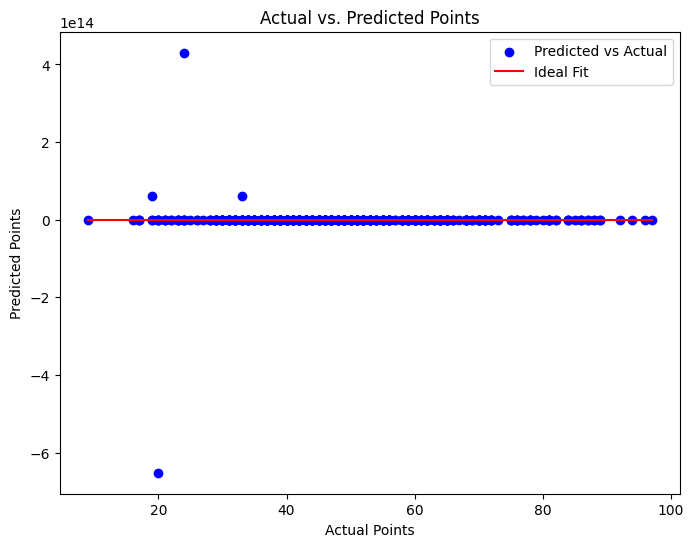

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal Fit')

# Adding labels and legend
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.legend()
plt.show()

## A problem
We have identified that our data is misleading the model, as it is no longer representative of the underlying patterns. To address this issue, we will first scale the data to ensure consistency across features and then apply regularization to the linear model to improve its robustness and generalization.

## 5. SCALING OUR DATA 

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. applying regularization to the linear model

In [38]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
ridge_model1 = Ridge(alpha=1)
ridge_model1.fit(X_train, y_train)
y_pred=ridge_model1.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', metrics.r2_score(y_test, y_pred))

MSE: 131.03998283413267
R_squared: 0.47538221083433274


## 7.Tuning our Hyperparamters

In [39]:
ridge_model2 = Ridge(alpha=0.5)
ridge_model2.fit(X_train, y_train)
y_pred=ridge_model2.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', metrics.r2_score(y_test, y_pred))

MSE: 130.27856971044366
R_squared: 0.4784305237305354


In [40]:
ridge_model3= Ridge(alpha=0.1)
ridge_model3.fit(X_train, y_train)
y_pred=ridge_model3.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', metrics.r2_score(y_test, y_pred))

MSE: 129.9758766264227
R_squared: 0.4796423536857928


## The best Hyperparamters

In [41]:
ridge_model4 = Ridge(alpha=0.01)
ridge_model4.fit(X_train, y_train)
y_pred=ridge_model4.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R_squared:', metrics.r2_score(y_test, y_pred))

MSE: 128.61831815515305
R_squared: 0.48507733092294714


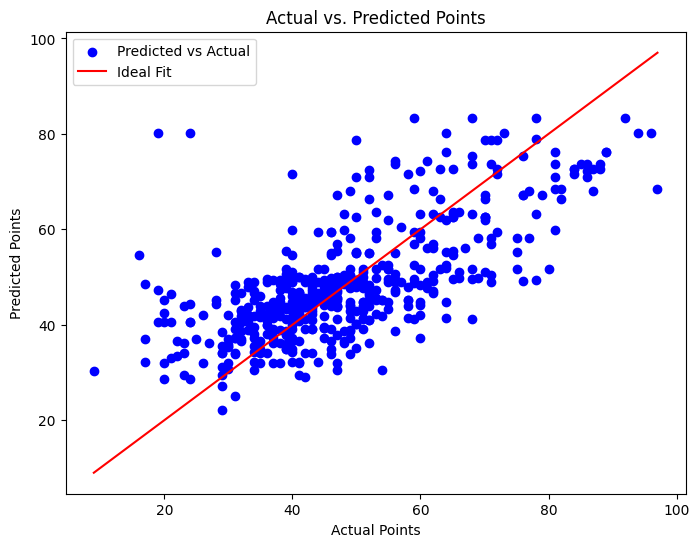

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal Fit')

# Adding labels and legend
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.legend()
plt.show()

In [43]:
team_to_predict = 'Team_LIV'
input_data = pd.DataFrame({col: [0] for col in team_columns}) 

input_data[team_to_predict] = 1 


predicted_points = ridge_model4.predict(input_data)
print(f"Predicted Points for {team_to_predict}: {predicted_points[0]}")


Predicted Points for Team_LIV: 72.24650931590129
